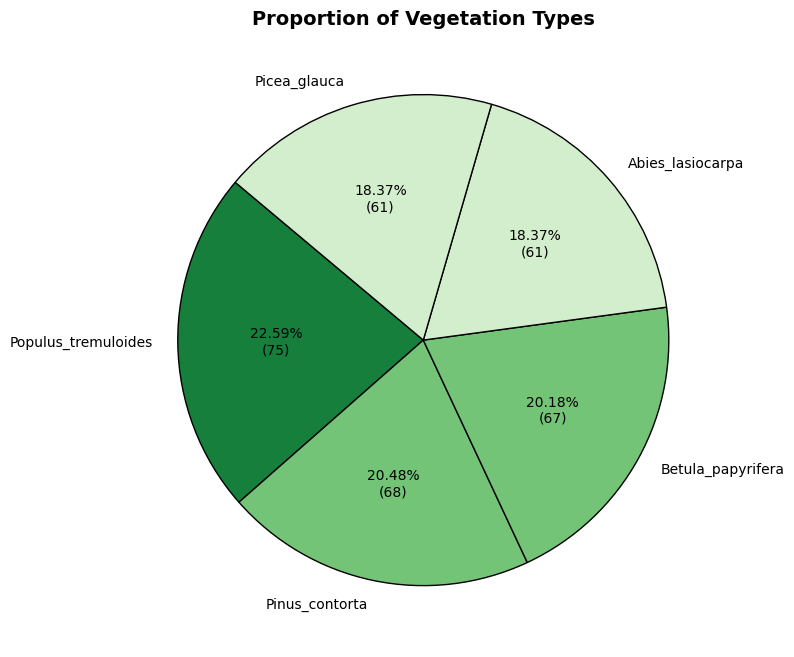

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

file_path = "Final_Vegetation_Dataset.csv"  
data = pd.read_csv(file_path)

vegetation_counts = data['Vegetation_Type'].value_counts()
percentages = vegetation_counts / vegetation_counts.sum() * 100 

colors = []
for pct in percentages:
    if pct > 22:  
        colors.append(plt.cm.Greens(0.8))  
    elif pct > 20:  
        colors.append(plt.cm.Greens(0.5))  
    else:  
        colors.append(plt.cm.Greens(0.2))  

def autopct_with_count(pct, all_values):
    count = int(np.round(pct / 100. * np.sum(all_values)))
    return f'{pct:.2f}%\n({count})'  # Updated to two decimal places

plt.figure(figsize=(8, 8))
plt.pie(
    vegetation_counts, 
    labels=vegetation_counts.index, 
    autopct=lambda pct: autopct_with_count(pct, vegetation_counts), 
    startangle=140, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Proportion of Vegetation Types', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


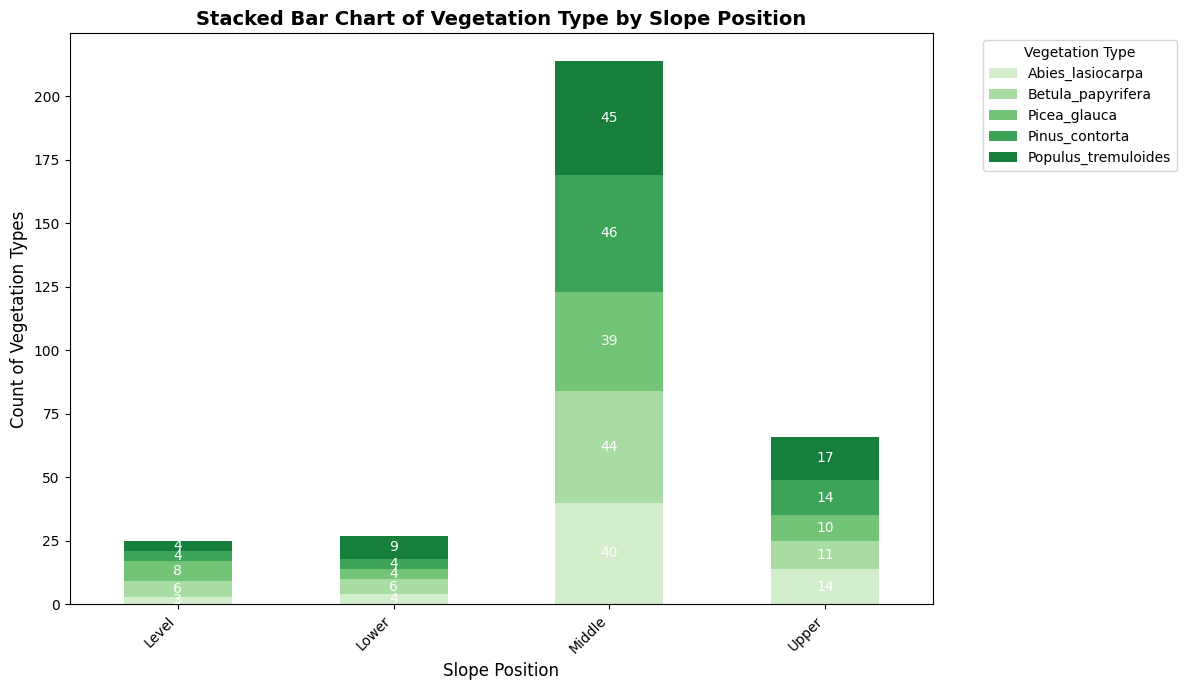

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Group data by Slope_Position and Vegetation_Type, then count occurrences
grouped_data = data.groupby(['Slope_Position', 'Vegetation_Type']).size().unstack(fill_value=0)

# Plot the stacked bar chart
ax = grouped_data.plot(
    kind='bar', 
    stacked=True, 
    color=plt.cm.Greens(np.linspace(0.2, 0.8, len(grouped_data.columns))), 
    figsize=(12, 7)  # Increase figure size for better clarity
)

# Set chart title and labels
plt.title('Stacked Bar Chart of Vegetation Type by Slope Position', fontsize=14, fontweight='bold')
plt.xlabel('Slope Position', fontsize=12)
plt.ylabel('Count of Vegetation Types', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Vegetation Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate the bars with the counts
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Annotate only bars with non-zero height
        ax.text(
            p.get_x() + p.get_width() / 2, 
            p.get_y() + height / 2,         
            f'{int(height)}',              # Display raw count
            ha='center', va='center',      
            fontsize=10, color='white'     
        )

# Optimize layout and display the plot
plt.tight_layout()
plt.show()


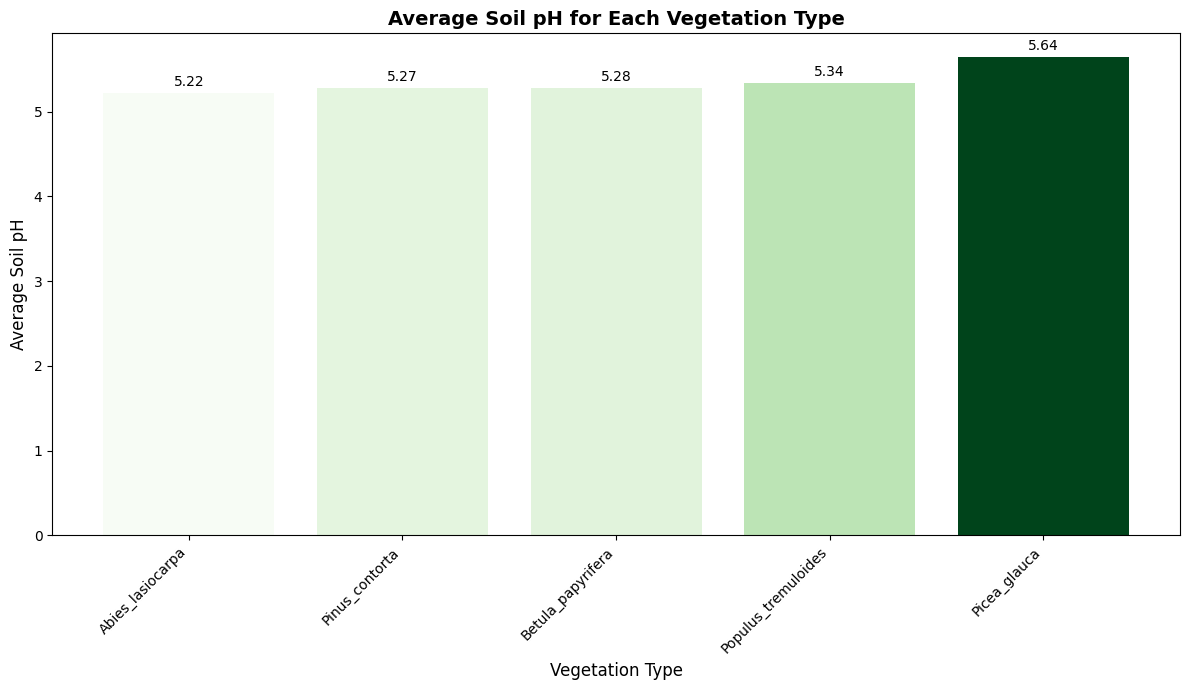

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Group the data by 'Vegetation_Type' and calculate the average 'Soil_pH' for each type
avg_soil_ph = data.groupby('Vegetation_Type')['Soil_pH'].mean()

# Sort the data by Vegetation_Type for better presentation (optional)
avg_soil_ph = avg_soil_ph.sort_values()

plt.figure(figsize=(12, 7))  

bars = plt.bar(avg_soil_ph.index, avg_soil_ph, color=plt.cm.Greens((avg_soil_ph - avg_soil_ph.min()) / (avg_soil_ph.max() - avg_soil_ph.min())))
plt.title('Average Soil pH for Each Vegetation Type', fontsize=14, fontweight='bold')
plt.xlabel('Vegetation Type', fontsize=12)
plt.ylabel('Average Soil pH', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


In [11]:
pip install pandas folium



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
import folium
from matplotlib.cm import get_cmap
from matplotlib.colors import to_hex
from IPython.display import display

# Load the dataset
file_path = 'Final_Vegetation_Dataset.csv'  # Replace with your dataset path
dataset = pd.read_csv(file_path)

# Extract relevant columns
map_data = dataset[['Latitude', 'Longitude', 'Leading_Vegetation_Species']]

# Define a color palette based on species
species = map_data['Leading_Vegetation_Species'].unique()
cmap = get_cmap('tab10')  # Use a colormap with enough distinct colors
species_colors = {species[i]: to_hex(cmap(i / len(species))) for i in range(len(species))}

# Create a base map
base_map = folium.Map(location=[map_data['Latitude'].mean(), map_data['Longitude'].mean()], zoom_start=7)

# Add points to the map
for _, row in map_data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,  # Fixed bubble size
        color=species_colors[row['Leading_Vegetation_Species']],
        fill=True,
        fill_color=species_colors[row['Leading_Vegetation_Species']],
        fill_opacity=0.7,
        popup=f"Species: {row['Leading_Vegetation_Species']}",
    ).add_to(base_map)

# Function to add a legend to the map
def add_legend(map_object, species_colors):
    legend_html = '''
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 250px; height: auto; 
                z-index:9999; font-size:14px; background-color: white; 
                border:2px solid grey; padding: 10px;">
    <strong>Legend: Vegetation Species</strong><br>
    '''
    for species, color in species_colors.items():
        legend_html += f'<div style="display: flex; align-items: center; margin-bottom: 5px;">'
        legend_html += f'<div style="background-color:{color}; width: 20px; height: 20px; margin-right: 5px;"></div>'
        legend_html += f'{species}</div>'
    legend_html += '</div>'
    map_object.get_root().html.add_child(folium.Element(legend_html))

# Add the legend to the map
add_legend(base_map, species_colors)
    
# Display the map in Jupyter Notebook
display(base_map)


C:\Users\Rohan\AppData\Local\Temp\ipykernel_26224\2554672249.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab10')  # Use a colormap with enough distinct colors


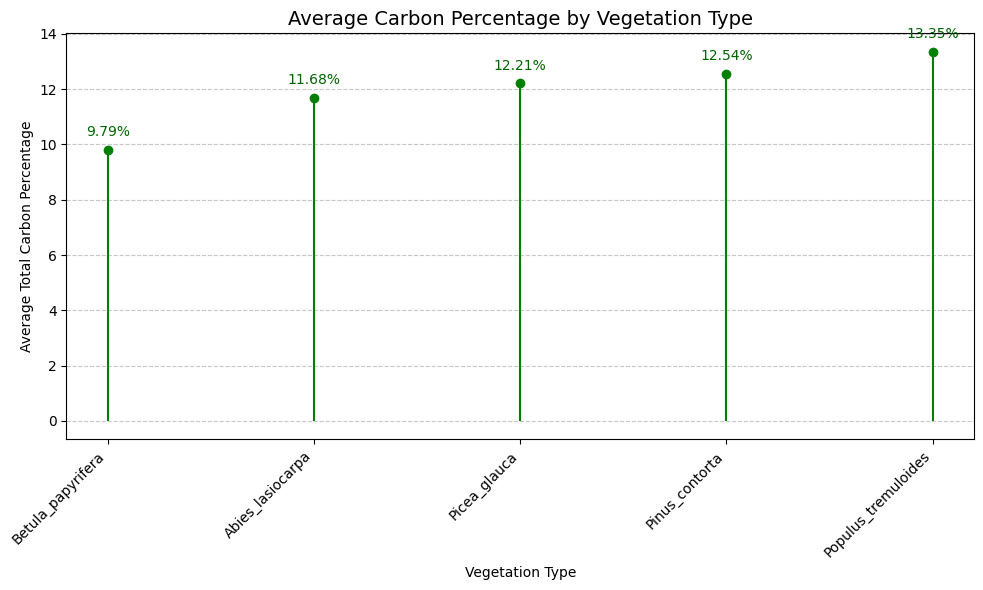

In [13]:
# Lollipop chart for average carbon percentage with annotations
avg_carbon = dataset.groupby('Vegetation_Type')['Total_Carbon_Percentage'].mean().sort_values()

plt.figure(figsize=(10, 6))

# Create the lollipop stems
plt.stem(avg_carbon.index, avg_carbon.values, linefmt='green', markerfmt='go', basefmt=" ")
for i, value in enumerate(avg_carbon.values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', fontsize=10, color='darkgreen')
plt.title('Average Carbon Percentage by Vegetation Type', fontsize=14)
plt.xlabel('Vegetation Type')
plt.ylabel('Average Total Carbon Percentage')
plt.xticks(rotation=45, ha='right')  # Adj
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


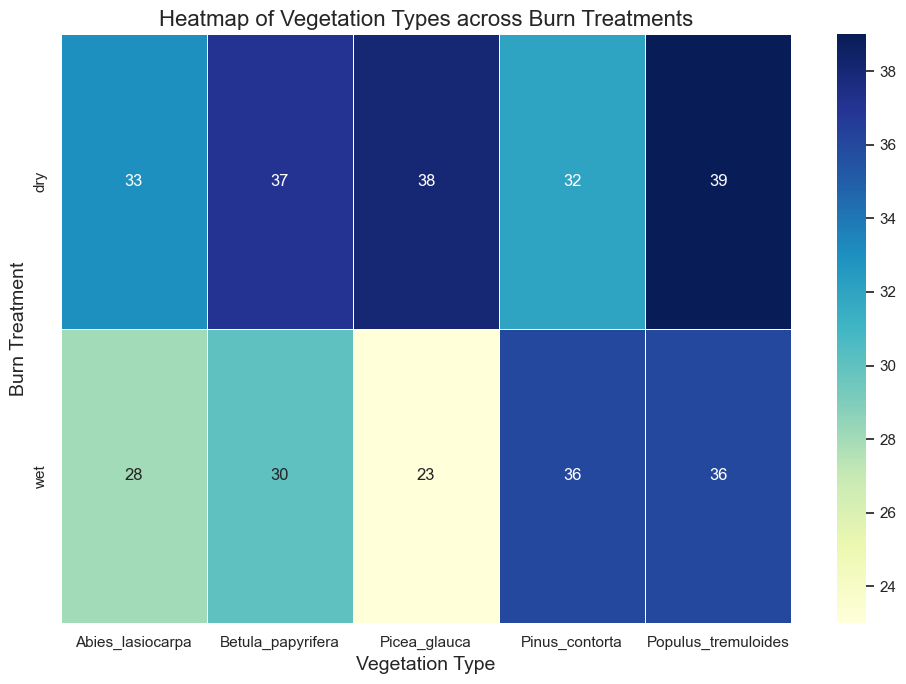

In [56]:
# Create a contingency table for Burn_Treatment and Vegetation_Type
burn_vegetation_counts = pd.crosstab(vegetation_data['Burn_Treatment'], vegetation_data['Vegetation_Type'])

# Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(burn_vegetation_counts, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Vegetation Types across Burn Treatments', fontsize=16)
plt.xlabel('Vegetation Type', fontsize=14)
plt.ylabel('Burn Treatment', fontsize=14)
plt.tight_layout()
plt.show()


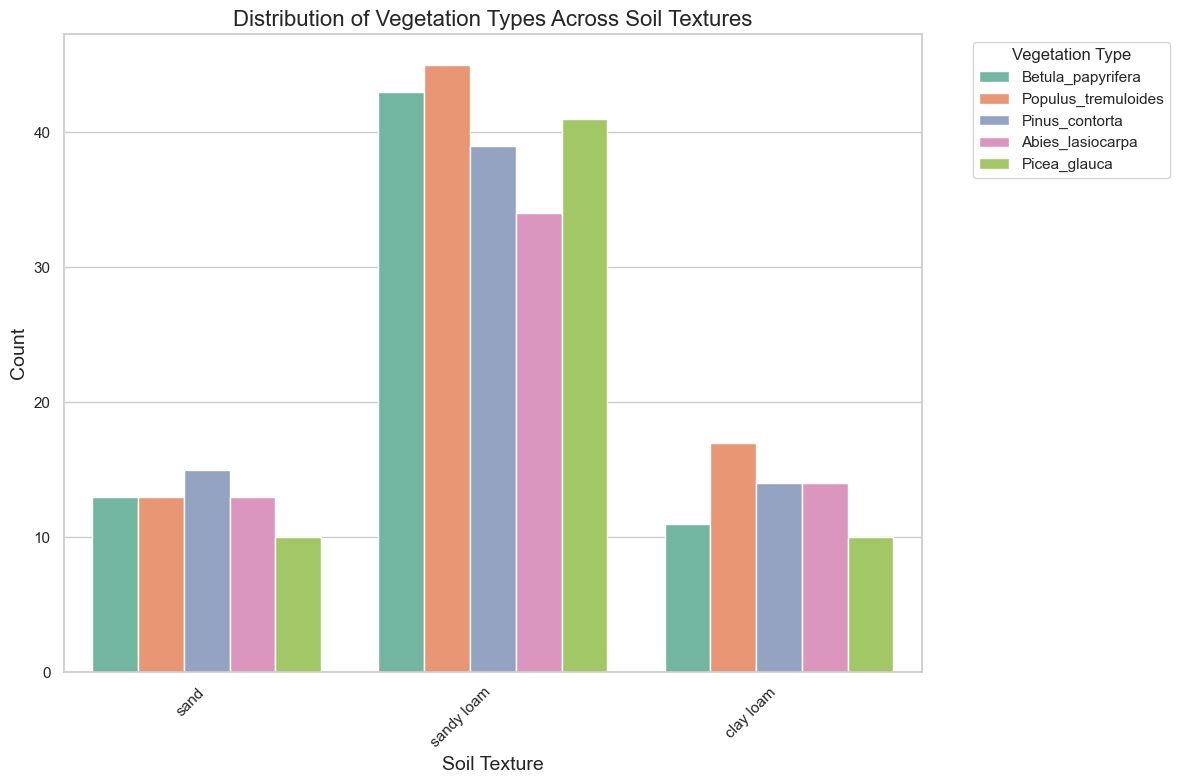

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
file_path = 'Final_Vegetation_Dataset.csv'  # Replace with your file path
vegetation_data = pd.read_csv(file_path)

# Filter the dataset for the specific soil textures
soil_textures = ['sand', 'sandy loam', 'clay loam']
filtered_data = vegetation_data[vegetation_data['Soil_Texture'].isin(soil_textures)]

plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_data, x='Soil_Texture', hue='Vegetation_Type', palette='Set2')
plt.title('Distribution of Vegetation Types Across Soil Textures', fontsize=16)
plt.xlabel('Soil Texture', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Vegetation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
